## Credit Card Customer Segmentation

### Background

AllLife Bank wants to focus on its credit card customer base in the next financial year. They have been advised by their marketing research team, that the penetration in the market can be improved. Based on this input, the Marketing team proposes to run personalised campaigns to target new customers as well as upsell to existing customers. Another insight from the market research was that the customers perceive the support services of the back poorly. Based on this, the Operations team wants to upgrade the service delivery model, to ensure that customers queries are resolved faster. Head of Marketing and Head of Delivery both decide to reach out to the Data Science team for help.

### Objective

To identify different segments in the existing customer based on their spending patterns as well as past interaction with the bank.

### Data Description

Data is of various customers of a bank with their credit limit, the total number of credit cards the customer has, and different channels through which customer has contacted the bank for any queries, different channels include visiting the bank, online and through a call centre.

### Key Questions

1. How many different segments of customers are there?
2. How are these segments different from each other?
3. What are your recommendations to the bank on how to better market to and service these customers?

Github Link: https://github.com/deepak-padmanabhan/PGP-AIML

### Exploratory Data Analysis

In [205]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 
# To enable plotting graphs in Jupyter notebook
import seaborn as sns
import itertools
from scipy.stats import zscore
# Remove scientific notations and display numbers with 2 decimal points instead
pd.options.display.float_format = '{:,.2f}'.format
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import silhouette_score
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage, cophenet, fcluster
from scipy.spatial.distance import pdist


In [206]:
df = []
df = pd.read_excel('Credit Card Customer Data.xlsx',index_col='Sl_No')
df.head()

,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
Sl_No,,,,,,
1,87073,100000,2,1,1,0
2,38414,50000,3,0,10,9
3,17341,50000,7,1,3,4
4,40496,30000,5,1,1,4
5,47437,100000,6,0,12,3


In [207]:
df.shape

(660, 6)

The dataset contains 660 records and 6 columns

In [208]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 660 entries, 1 to 660
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   Customer Key         660 non-null    int64
 1   Avg_Credit_Limit     660 non-null    int64
 2   Total_Credit_Cards   660 non-null    int64
 3   Total_visits_bank    660 non-null    int64
 4   Total_visits_online  660 non-null    int64
 5   Total_calls_made     660 non-null    int64
dtypes: int64(6)
memory usage: 36.1 KB


All columns contain integers and there are no null values 

In [209]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Customer Key,660.00,"55,141.44","25,627.77","11,265.00","33,825.25","53,874.50","77,202.50","99,843.00"
Avg_Credit_Limit,660.00,"34,574.24","37,625.49","3,000.00","10,000.00","18,000.00","48,000.00","200,000.00"
Total_Credit_Cards,660.00,4.71,2.17,1.00,3.00,5.00,6.00,10.00
Total_visits_bank,660.00,2.40,1.63,0.00,1.00,2.00,4.00,5.00
Total_visits_online,660.00,2.61,2.94,0.00,1.00,2.00,4.00,15.00
Total_calls_made,660.00,3.58,2.87,0.00,1.00,3.00,5.00,10.00


In [210]:
df.isnull().sum()

Customer Key           0
Avg_Credit_Limit       0
Total_Credit_Cards     0
Total_visits_bank      0
Total_visits_online    0
Total_calls_made       0
dtype: int64

In [211]:
df.isna().sum()

Customer Key           0
Avg_Credit_Limit       0
Total_Credit_Cards     0
Total_visits_bank      0
Total_visits_online    0
Total_calls_made       0
dtype: int64

In [212]:
df[df.duplicated()]

,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
Sl_No,,,,,,


the dataset do not contain duplicate rows across all columns 

In [213]:
df[df['Customer Key'].duplicated()]

,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
Sl_No,,,,,,
333,47437,17000,7,3,1,0
399,96929,67000,6,2,2,2
433,37252,59000,6,2,1,2
542,50706,60000,7,5,2,2
633,97935,187000,7,1,7,0


The dataset contains multiple rows for 5 Customer Keys. Only the customer key is a duplicate. The rest of the columns have different values for these 5 Customer Keys 

In [214]:
for k in [47437, 96929, 37252, 50706,97935]:
    display(df[df['Customer Key'] == k])

,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
Sl_No,,,,,,
5,47437,100000,6,0,12,3
333,47437,17000,7,3,1,0


,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
Sl_No,,,,,,
392,96929,13000,4,5,0,0
399,96929,67000,6,2,2,2


,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
Sl_No,,,,,,
49,37252,6000,4,0,2,8
433,37252,59000,6,2,1,2


,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
Sl_No,,,,,,
412,50706,44000,4,5,0,2
542,50706,60000,7,5,2,2


,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
Sl_No,,,,,,
105,97935,17000,2,1,2,10
633,97935,187000,7,1,7,0


It looks like the duplicate rows are updated data for the 5 Customer Keys. Hence will retain these duplicate rows 

In [215]:
# Dropping Customer Key column
df.drop('Customer Key', axis=1,inplace=True)
df.head()

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
Sl_No,,,,,
1,100000,2,1,1,0
2,50000,3,0,10,9
3,50000,7,1,3,4
4,30000,5,1,1,4
5,100000,6,0,12,3


In [216]:
#Scaling the data 
df_z = []
df_z = df.apply(zscore)
df_z.head()

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
Sl_No,,,,,
1,1.74,-1.25,-0.86,-0.55,-1.25
2,0.41,-0.79,-1.47,2.52,1.89
3,0.41,1.06,-0.86,0.13,0.15
4,-0.12,0.14,-0.86,-0.55,0.15
5,1.74,0.60,-1.47,3.20,-0.20


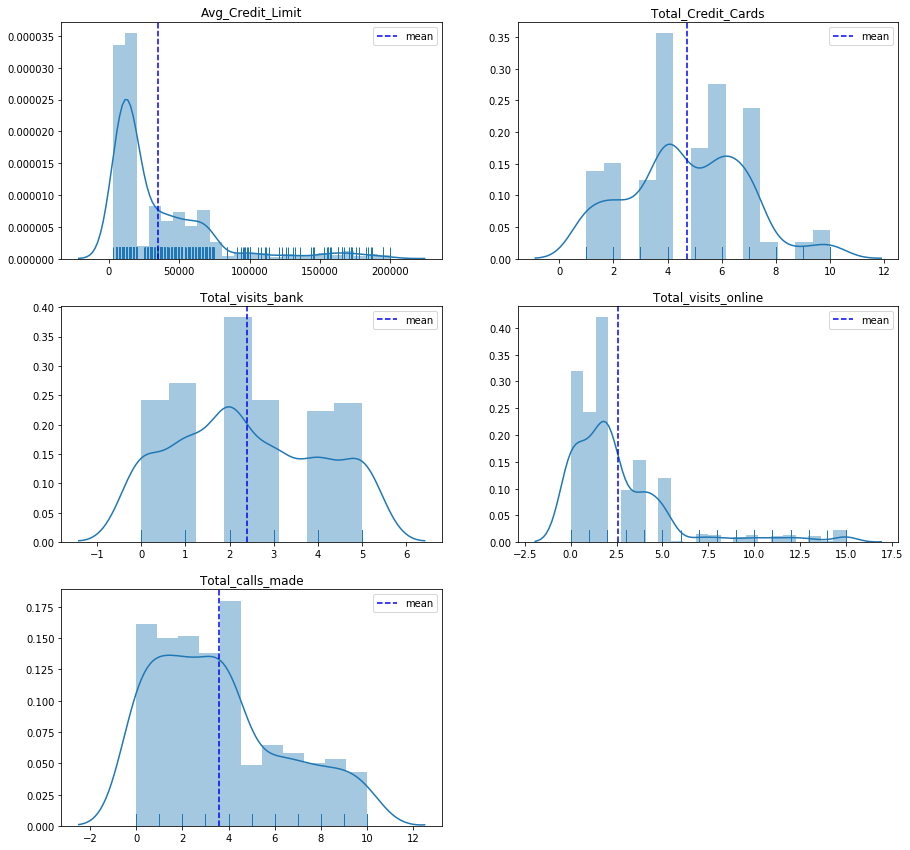

In [217]:
cols = [i for i in df.columns]

plt.figure(figsize=(15, 20))

for i,j in itertools.zip_longest(cols, range(len(cols))):
    plt.subplot(4,2,j+1)
    ax = sns.distplot(df[i],rug=True)
    plt.axvline(df[i].mean(),linestyle="dashed",label="mean", color='blue')
    plt.legend()
    plt.title(i)
    plt.xlabel("")

In [218]:
df.skew()

Avg_Credit_Limit      2.20
Total_Credit_Cards    0.14
Total_visits_bank     0.14
Total_visits_online   2.23
Total_calls_made      0.66
dtype: float64

All the columns appear to have multiple peaks. Though the Avg_Credit_Limit and Total_visits_online data appear to be skewed, the data seems to be relevant and hence will not make any adjustments. Most of the columns appear to be normally distributed. 

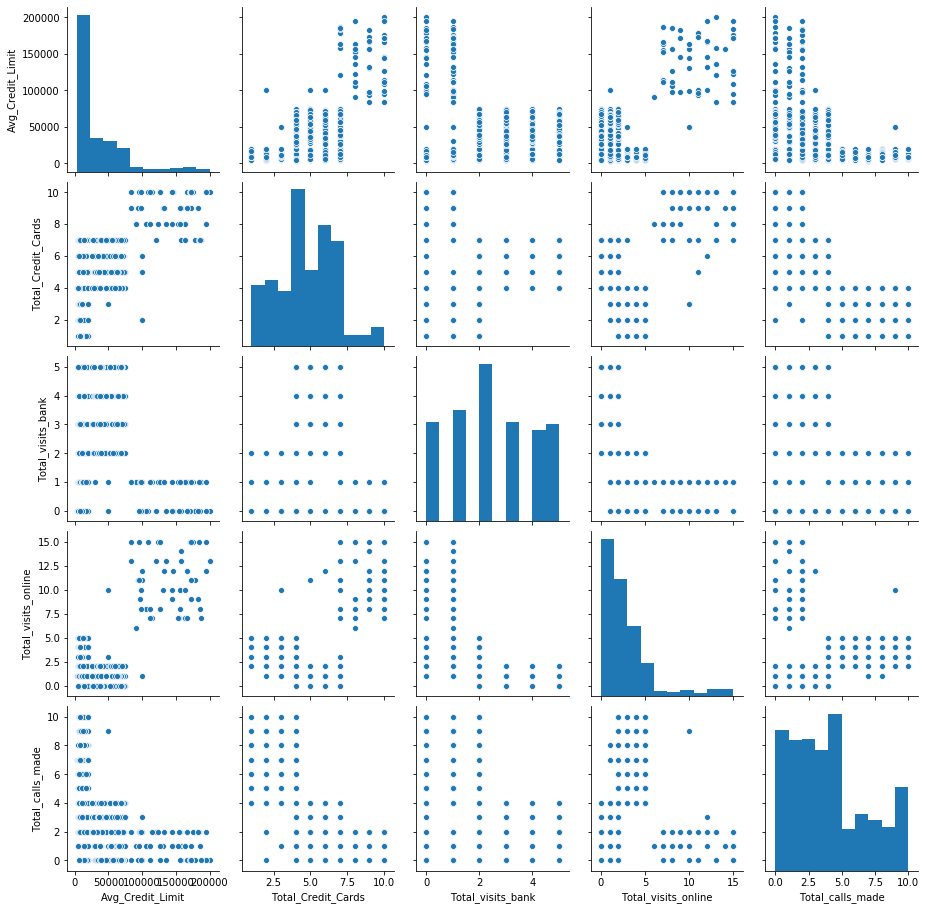

In [219]:
sns.pairplot(df)
plt.show()

In [220]:
df.corr()

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
Avg_Credit_Limit,1.00,0.61,-0.10,0.55,-0.41
Total_Credit_Cards,0.61,1.00,0.32,0.17,-0.65
Total_visits_bank,-0.10,0.32,1.00,-0.55,-0.51
Total_visits_online,0.55,0.17,-0.55,1.00,0.13
Total_calls_made,-0.41,-0.65,-0.51,0.13,1.00


1. Total number of credit cards held by the customer is positively correlated to the avg credit limit 
2. Customers with higher average credit limit and number of credit cards tend to make lower the number of calls
3. Customers with higher average credit limit prefer online services

### K-Means Clustering

Text(0.5, 1.0, 'Selecting k with the Elbow Method')

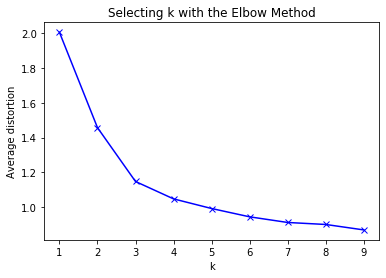

In [221]:
#Finding optimal no. of clusters
from scipy.spatial.distance import cdist
clusters=range(1,10)
meanDistortions=[]

for k in clusters:
    model=KMeans(n_clusters=k)
    model.fit(df_z)
    prediction=model.predict(df_z)
    meanDistortions.append(sum(np.min(cdist(df_z, model.cluster_centers_, 'euclidean'), axis=1)) / df_z.shape[0])


plt.plot(clusters, meanDistortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Average distortion')
plt.title('Selecting k with the Elbow Method')


We can see a bend at k = 3 indicating 3 clusters. Need to check the silhouette scores for various k values 

Text(0, 0.5, 'Silhouette Scores')

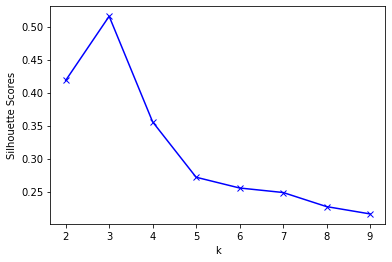

In [222]:
#Plotting the silhouette scores for various clusters 
clusters=range(2,10)
silhouette_scores=[]

for k in clusters:
    kmeans = KMeans(n_clusters=k, n_init = 15, random_state=2345)
    kmeans.fit(df_z)
    pred = kmeans.predict(df_z)
    labels = kmeans.labels_
    silhouette_scores.append(silhouette_score(df_z, labels, metric='euclidean'))
 
plt.plot(clusters, silhouette_scores, 'bx-')
plt.xlabel('k')
plt.ylabel('Silhouette Scores')

k = 3 has the highest Silhouette score. Hence, building the KMeans model with 3 clusters

In [223]:
# Final model with k = 3
kmeans = KMeans(n_clusters=3, n_init = 15, random_state=2345)
kmeans.fit(df_z)
pred = kmeans.predict(df_z)

In [224]:
# Checking the number of data in each cluster
labels = kmeans.labels_
counts = np.bincount(labels[labels>=0])
print(counts)

[224 386  50]


In [225]:
#Append the prediction to the dataframe
df["K_CLUSTER"] = pred
df_z["K_CLUSTER"] = pred
df.head()

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made,K_CLUSTER
Sl_No,,,,,,
1,100000,2,1,1,0,1
2,50000,3,0,10,9,0
3,50000,7,1,3,4,1
4,30000,5,1,1,4,1
5,100000,6,0,12,3,2


In [226]:
#Determining the silhouette score for 3 clusters 
from sklearn.metrics import silhouette_score
silhouette_score(df_z, labels, metric='euclidean')

0.5397786437631975

In [227]:
#Grouping by the clusters and determining the mean values across the columns for the 3 clusters  
df.groupby('K_CLUSTER').mean()

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
K_CLUSTER,,,,,
0,"12,174.11",2.41,0.93,3.55,6.87
1,"33,782.38",5.52,3.49,0.98,2.00
2,"141,040.00",8.74,0.60,10.90,1.08


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001B299DBB0C8>,
      dtype=object)

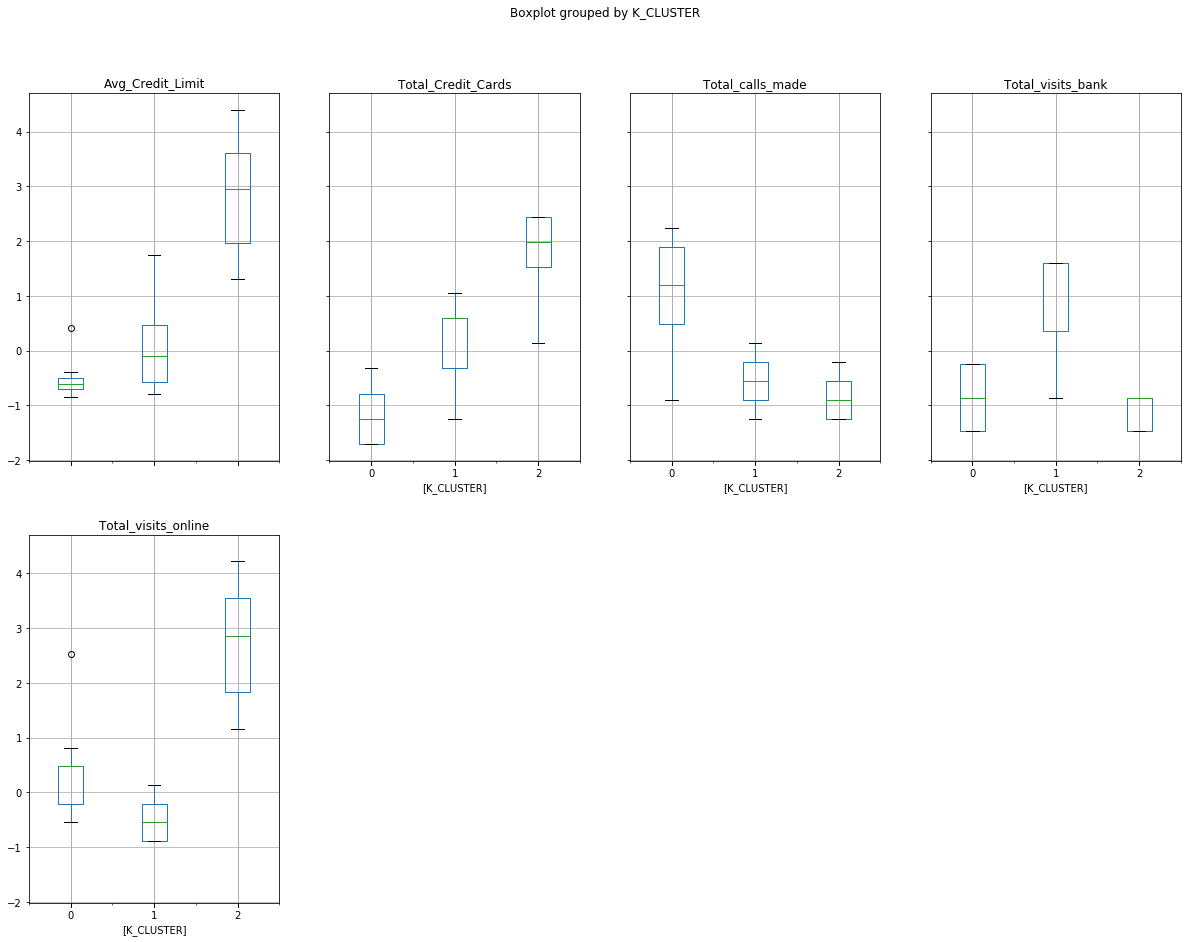

In [228]:
df_z.boxplot(by = 'K_CLUSTER',  layout=(2,4), figsize=(20, 15))

1. 224 Customers in Cluster 0 prefer making phone calls to the bank. They have lower average credit limit and number of credit cards 
2. 386 Customers in Cluster 1 prefer visiting the bank. They have higher average credit limit and number of credit cards when compared to customers in Cluster 0 
3. 50 Customers in Cluster 2 prefer using online services. They have the highest average credit limit and number of credit cards 

### Hierarchial Clustering

In [229]:
# Dropping K_CLUSTER column
df_z.drop('K_CLUSTER', axis=1,inplace=True)
df_z.head()

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
Sl_No,,,,,
1,1.74,-1.25,-0.86,-0.55,-1.25
2,0.41,-0.79,-1.47,2.52,1.89
3,0.41,1.06,-0.86,0.13,0.15
4,-0.12,0.14,-0.86,-0.55,0.15
5,1.74,0.60,-1.47,3.20,-0.20


In [230]:
# Creating a dataframe to compare the cophente and silhouette scores for the various linkage metrics 
hdf = pd.DataFrame()
linkage_method = []
cophenetic = []
sil = []
hdf = pd.DataFrame(list(zip(linkage_method, cophenetic,sil)),columns=['method','cophenete','silhouette'])
hdf

,method,cophenete,silhouette


#### Average Linkage Metric

In [231]:
# Determining the linkage matrix for average method and euclidean distance 
linkage_method.append('average')
Z = linkage(df_z, metric='euclidean', method='average')
c, coph_dists = cophenet(Z , pdist(df_z))
cophenetic.append(c)
c

0.8977080867389372

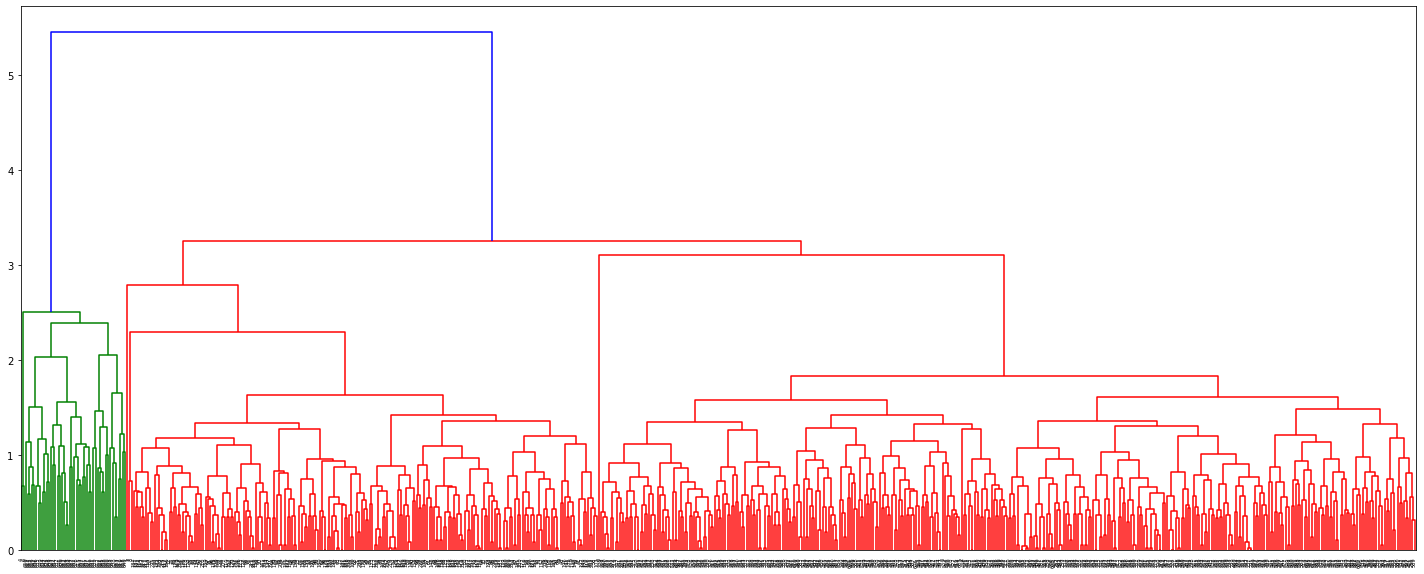

In [232]:
# Plotting the dendogram 
plt.figure(figsize=(25, 10))
dendrogram(Z)
plt.show()

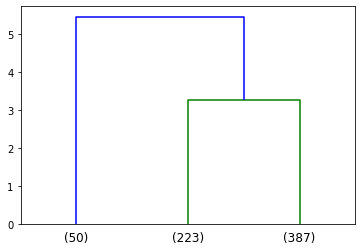

In [233]:
#Use the truncated dendrogram, to find out the optimal distance between clusters to be used as input for clustering data
dendrogram(
    Z,
    truncate_mode='lastp',  # show only the last p merged clusters
    p=3,  # show only the last p merged clusters
)
plt.show()

In [234]:
max_d = 3.2

In [235]:
#Use the distance measure(max_d) and fcluster function to cluster the data into 3 different groups
clusters = fcluster(Z, max_d, criterion='distance')
clusters

array([3, 2, 3, 3, 1, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,

In [236]:
#Determine the silhouette score 
sil.append(silhouette_score(df_z,clusters))

In [237]:
hdf = pd.DataFrame(list(zip(linkage_method, cophenetic,sil)),columns=['method','cophenete','silhouette'])
hdf

,method,cophenete,silhouette
0,average,0.90,0.52


#### Ward Linkage Metric

In [238]:
# Determining the linkage matrix for ward method and euclidean distance 
linkage_method.append('ward')
Z = linkage(df_z, metric='euclidean', method='ward')
c, coph_dists = cophenet(Z , pdist(df_z))
cophenetic.append(c)
c

0.7415156284827493

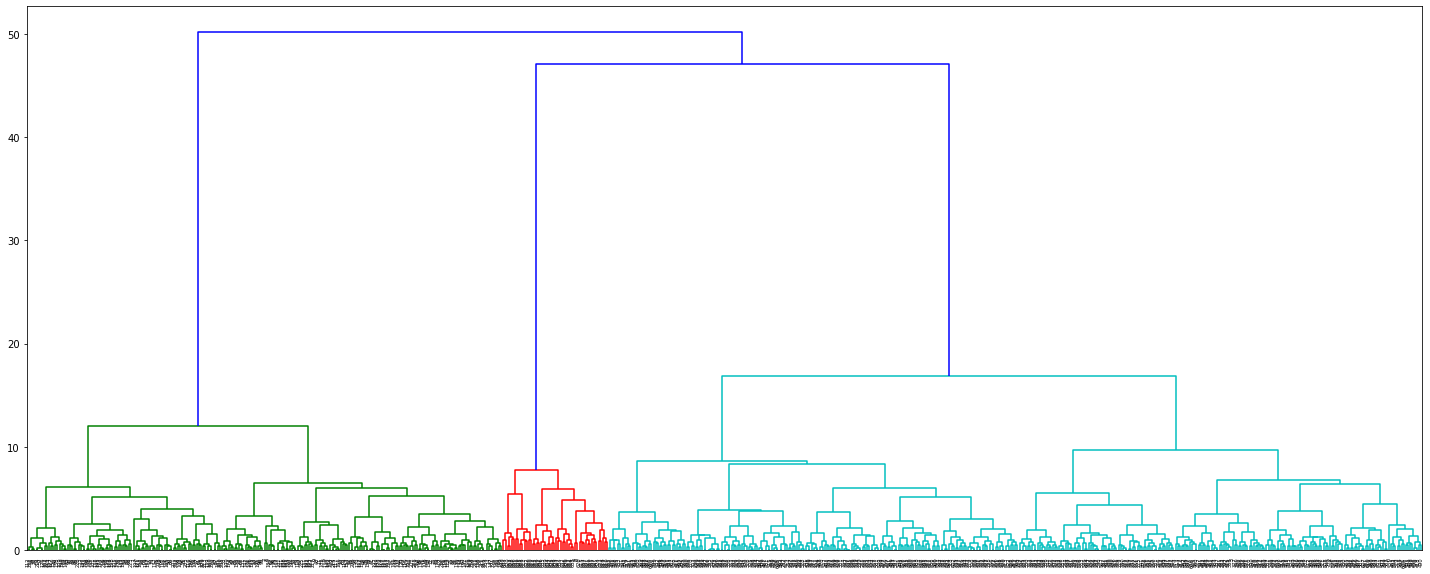

In [239]:
# Plotting the dendogram 
plt.figure(figsize=(25, 10))
dendrogram(Z)
plt.show()

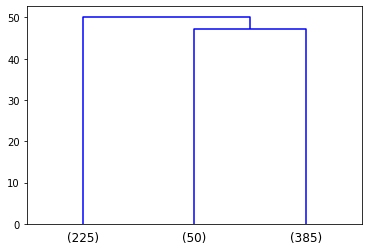

In [240]:
#Use the truncated dendrogram, to find out the optimal distance between clusters to be used as input for clustering data
dendrogram(
    Z,
    truncate_mode='lastp',  # show only the last p merged clusters
    p=3,  # show only the last p merged clusters
)
plt.show()

In [241]:
max_d = 20

In [242]:
#Use the distance measure(max_d) and fcluster function to cluster the data into 3 different groups
clusters = fcluster(Z, max_d, criterion='distance')
clusters

array([3, 1, 3, 3, 2, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 1, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,

In [243]:
#Determine the silhouette score 
sil.append(silhouette_score(df_z,clusters))

In [244]:
hdf = pd.DataFrame(list(zip(linkage_method, cophenetic,sil)),columns=['method','cophenete','silhouette'])
hdf

,method,cophenete,silhouette
0,average,0.90,0.52
1,ward,0.74,0.51


#### Centroid Linkage Metric

In [245]:
# Determining the linkage matrix for centroid method and euclidean distance
linkage_method.append('centroid')
Z = linkage(df_z, metric='euclidean', method='centroid')
c, coph_dists = cophenet(Z , pdist(df_z))
cophenetic.append(c)
c

0.8939385846326323

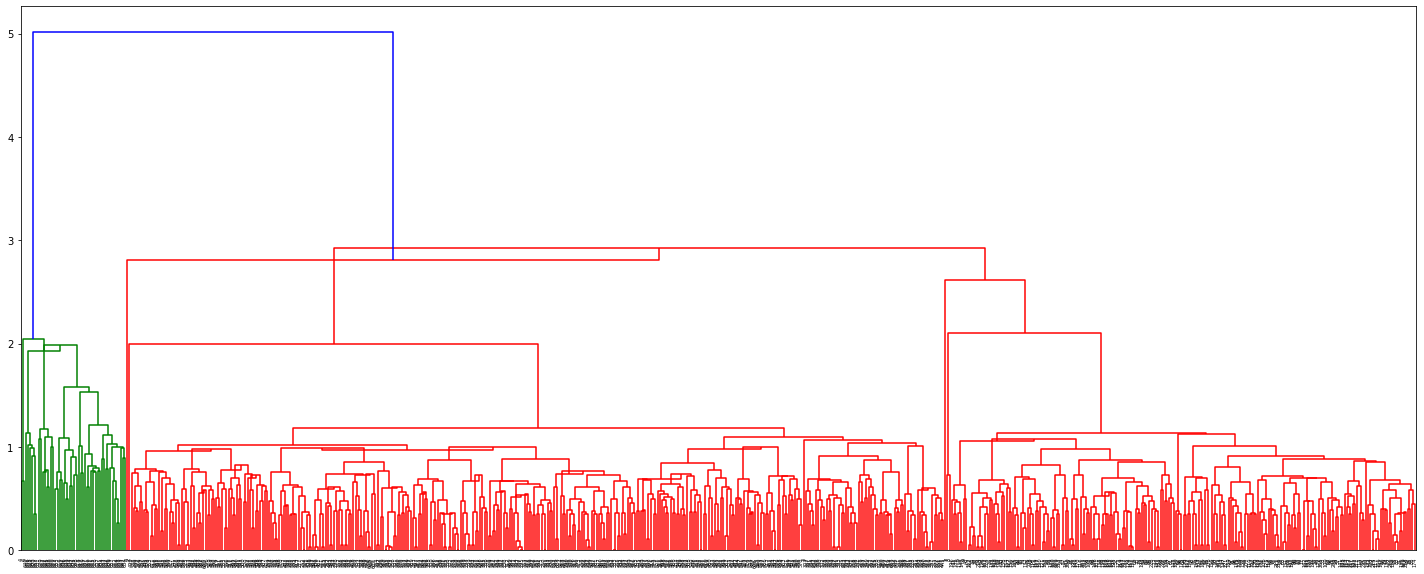

In [246]:
# Plotting the dendogram
plt.figure(figsize=(25, 10))
dendrogram(Z)
plt.show()

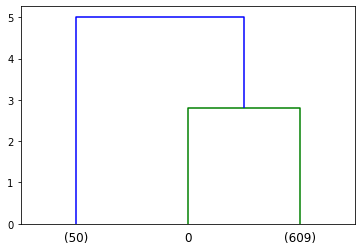

In [247]:
#Use the truncated dendrogram, to find out the optimal distance between clusters to be used as input for clustering data
dendrogram(
    Z,
    truncate_mode='lastp',  # show only the last p merged clusters
    p=3,  # show only the last p merged clusters
)
plt.show()

In [248]:
max_d = 2.9

In [249]:
#Use the distance measure(max_d) and fcluster function to cluster the data into 3 different groups
clusters = fcluster(Z, max_d, criterion='distance')
clusters

array([4, 3, 2, 2, 1, 3, 1, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,

In [250]:
#Determine the silhouette score 
sil.append(silhouette_score(df_z,clusters))

In [251]:
hdf = pd.DataFrame(list(zip(linkage_method, cophenetic,sil)),columns=['method','cophenete','silhouette'])
hdf

,method,cophenete,silhouette
0,average,0.90,0.52
1,ward,0.74,0.51
2,centroid,0.89,0.47


#### Complete Linkage Metric

In [252]:
# Determining the linkage matrix for complete method and euclidean distance
linkage_method.append('complete')
Z = linkage(df_z, metric='euclidean', method='complete')
c, coph_dists = cophenet(Z , pdist(df_z))
cophenetic.append(c)
c

0.8599730607972423

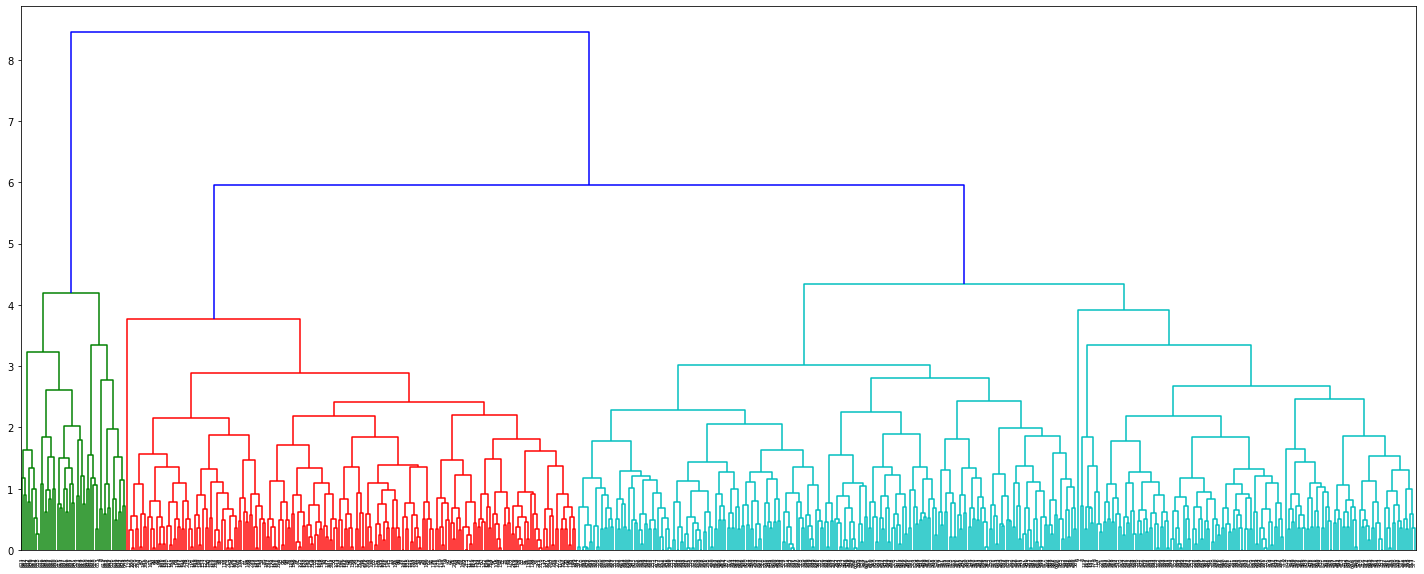

In [253]:
# Plotting the dendogram
plt.figure(figsize=(25, 10))
dendrogram(Z)
plt.show()

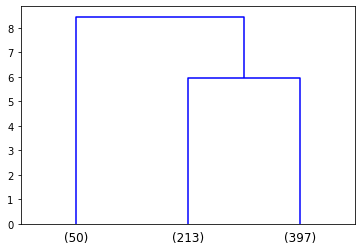

In [254]:
#Use the truncated dendrogram, to find out the optimal distance between clusters to be used as input for clustering data
dendrogram(
    Z,
    truncate_mode='lastp',  # show only the last p merged clusters
    p=3,  # show only the last p merged clusters
)
plt.show()

In [255]:
max_d=5

In [256]:
#Use the distance measure(max_d) and fcluster function to cluster the data into 3 different groups
clusters = fcluster(Z, max_d, criterion='distance')
clusters

array([3, 2, 3, 3, 1, 2, 1, 3, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3,
       3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 3, 2, 2, 2, 2, 2, 2, 2, 3, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 2, 2,
       2, 2, 2, 2, 2, 3, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,

In [257]:
# Determining the silhouette score
sil.append(silhouette_score(df_z,clusters))

#### Hierarchial Clustering Comparison based on different linkage metrics

In [258]:
hdf = pd.DataFrame(list(zip(linkage_method, cophenetic,sil)),columns=['method','cophenete','silhouette'])
hdf

,method,cophenete,silhouette
0,average,0.90,0.52
1,ward,0.74,0.51
2,centroid,0.89,0.47
3,complete,0.86,0.50


Average linkage metric resulted in the highest cophenetic coefficient and silhouette scores. Hence proceeding with determining the clusters and comparison with KMeans model using it. 

In [259]:
# Determining the linkage matrix and cophenetic coffecient for average method and euclidean distance
Z = linkage(df_z, metric='euclidean', method='average')
c, coph_dists = cophenet(Z , pdist(df_z))
c

0.8977080867389372

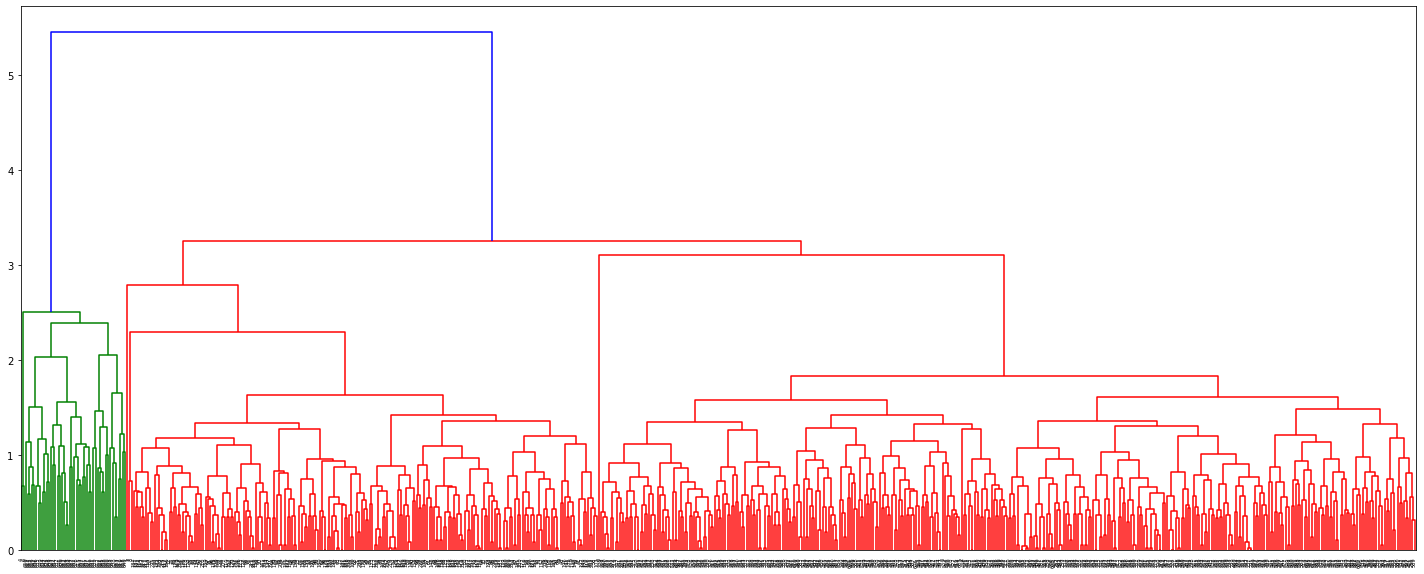

In [260]:
# Plotting the dendogram
plt.figure(figsize=(25, 10))
dendrogram(Z)
plt.show()

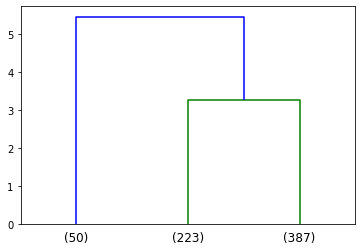

In [271]:
#Use the truncated dendrogram, to find out the optimal distance between clusters to be used as input for clustering data
dendrogram(
    Z,
    truncate_mode='lastp',  # show only the last p merged clusters
    p=3,  # show only the last p merged clusters
)
plt.show()

In [261]:
# Use the distance measure(max_d) and fcluster function to cluster the data into 3 different groups
max_d = 3.2
clusters = fcluster(Z, max_d, criterion='distance')
clusters

array([3, 2, 3, 3, 1, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,

In [262]:
#Adding the Hierarchial clusters to the scaled dataframe to analyze the customer groupings
df_z['H_CLUSTER'] = clusters
df_z.head()

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made,H_CLUSTER
Sl_No,,,,,,
1,1.74,-1.25,-0.86,-0.55,-1.25,3
2,0.41,-0.79,-1.47,2.52,1.89,2
3,0.41,1.06,-0.86,0.13,0.15,3
4,-0.12,0.14,-0.86,-0.55,0.15,3
5,1.74,0.60,-1.47,3.20,-0.20,1


In [268]:
#Adding the Hierarchial clusters to the original dataframe to analyze the customer groupings
df['H_CLUSTER'] = clusters
df.head()

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made,K_CLUSTER,H_CLUSTER
Sl_No,,,,,,,
1,100000,2,1,1,0,1,3
2,50000,3,0,10,9,0,2
3,50000,7,1,3,4,1,3
4,30000,5,1,1,4,1,3
5,100000,6,0,12,3,2,1


In [270]:
#Grouping by the clusters and determining the mean values across the columns for the 3 clusters  
df.groupby('H_CLUSTER').mean()

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made,K_CLUSTER
H_CLUSTER,,,,,,
1,"141,040.00",8.74,0.60,10.90,1.08,2.00
2,"12,197.31",2.40,0.93,3.56,6.88,0.00
3,"33,713.18",5.51,3.49,0.98,2.01,1.00


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001B291F76F88>,
      dtype=object)

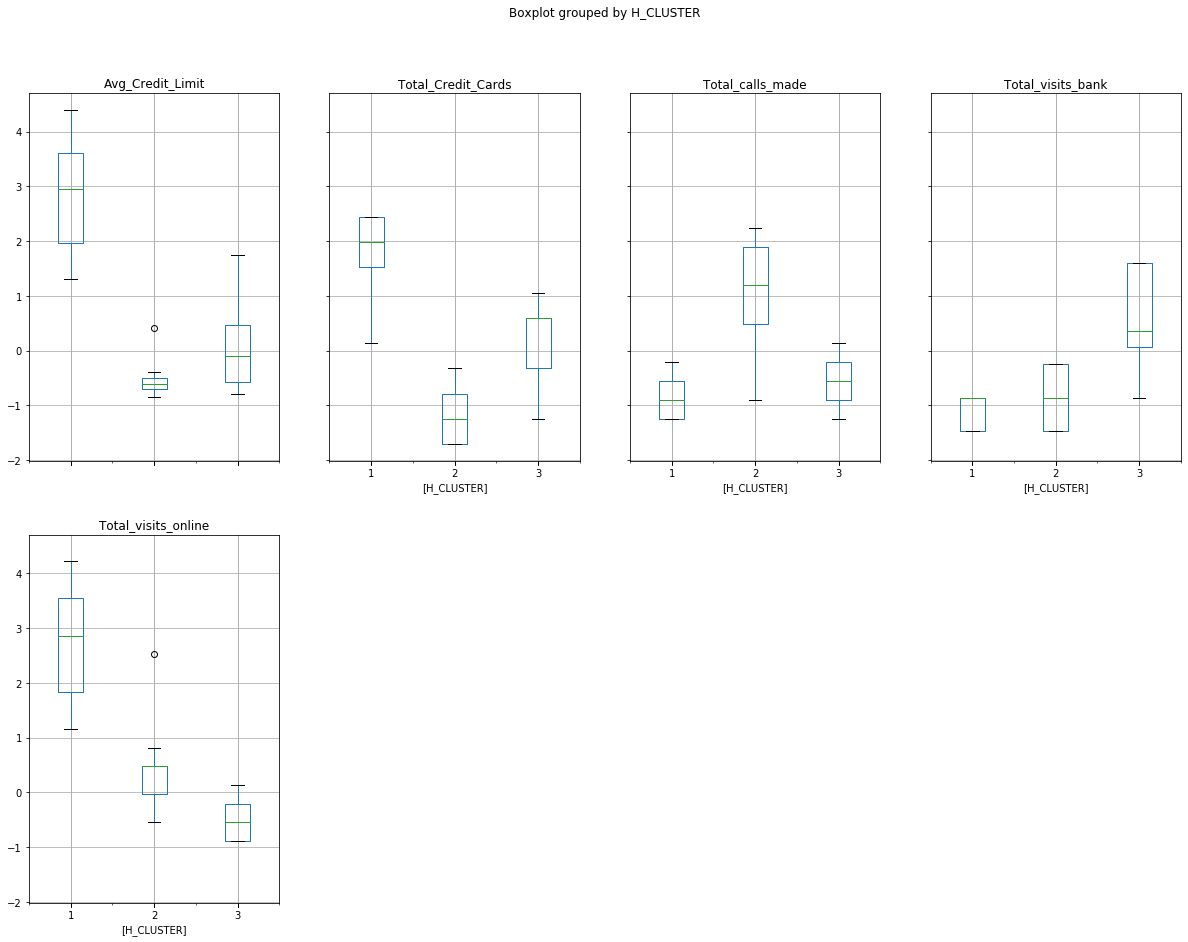

In [269]:
#Plotting boxplots to analyze the customer groupings
df_z.boxplot(by = 'H_CLUSTER',  layout=(2,4), figsize=(20, 15))

1. 50 Customers in Cluster 1 prefer using online services. They have the highest average credit limit and number of credit cards 
2. 223 Customers in Cluster 2 prefer making phone calls to the bank and using the least online services. They have lower average credit limit and number of credit cards 
3. 387 Customers in Cluster 3 prefer visiting the bank. They have higher average credit limit and number of credit cards when compared to customers in Cluster 0 

#### Comparing KMeans with Hierarchical Clusters 

In [276]:
df.groupby('K_CLUSTER').mean()

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made,H_CLUSTER
K_CLUSTER,,,,,,
0,"12,174.11",2.41,0.93,3.55,6.87,2.00
1,"33,782.38",5.52,3.49,0.98,2.00,3.00
2,"141,040.00",8.74,0.60,10.90,1.08,1.00


In [277]:
df.groupby('H_CLUSTER').mean()

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made,K_CLUSTER
H_CLUSTER,,,,,,
1,"141,040.00",8.74,0.60,10.90,1.08,2.00
2,"12,197.31",2.40,0.93,3.56,6.88,0.00
3,"33,713.18",5.51,3.49,0.98,2.01,1.00


1. KMeans Cluster 0 (224 users) / Hierarchical Cluster 2 (223 users) prefer making phone calls to the bank. They have the lowest average credit limit and number of credit cards 
2. KMeans Cluster 1 (386 users) / Hierarchical Cluster 3 (387 users) prefer visiting the bank. They have average credit limit and number of credit cards
3. KMeans Cluster 2 (50 users) / Hierarchical Cluster 1 (50 users) prefer using online services. They have the highest average credit limit and number of credit cards 

#### Answering key questions 

**How many different segments of customers are there?**

*Both KMeans and Hierarchical Clustering resulted in 3 different segments of customers based on their spending patterns and past interaction with the bank*

**How are these segments different from each other?**

*KMeans Cluster 0 (224 users) / Hierarchical Cluster 2 (223 users) prefer making phone calls to the bank. They have the lowest average credit limit and number of credit cards* 

*KMeans Cluster 1 (386 users) / Hierarchical Cluster 3 (387 users) prefer visiting the bank. They have average credit limit and number of credit cards*

*KMeans Cluster 2 (50 users) / Hierarchical Cluster 1 (50 users) prefer using online services. They have the highest average credit limit and number of credit cards* 

**What are your recommendations to the bank on how to better market to and service these customers?**

*Run personalized campaigns based on customer's communication preferences.*

*Customers with higher average credit limits and number of credit cards will prefer updates through websites/email/phone-call/text notifications.* 

*Users who visit the bank more often may prefer mailer communications and in-person awareness when they are at bank.* 

*There is a high opportunity to upsell to customers with lowest (224 customers) / average (386 customers) avg credit card limits and number of credit cards. These customers consititue more than 90% of the customers across the two segments. Plan to run targeted advertising campaigns to address these existing customer segments*

*Focus on handling customer inquiries digitally (online chats, phone calls etc) and building/enhancing digital customer care capabilities as about 66% of users prefer online services/phone calls* 